In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import sys
import argparse
import base64
import json

import numpy as np
import tensorflow as tf
from PIL import Image
from keras.models import model_from_yaml
from keras.layers import Dense, Flatten, Lambda, Activation, MaxPooling2D
from keras.layers.convolutional import Convolution2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from vis.utils import utils

import helper

/Users/karan/.virtualenvs/dlearn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
activation_relu = 'relu'

In [3]:
# Check if this can be moved to the Class
def create_model(hd5Path):
    model = Sequential()

    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(64, 64, 3)))

    # starts with five convolutional and maxpooling layers
    model.add(Convolution2D(24, 5, 5, border_mode='same', subsample=(2, 2)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(36, 5, 5, border_mode='same', subsample=(2, 2)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(48, 5, 5, border_mode='same', subsample=(2, 2)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1, 1)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1, 1)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Flatten())

    # Next, five fully connected layers
    model.add(Dense(1164))
    model.add(Activation(activation_relu))

    model.add(Dense(100))
    model.add(Activation(activation_relu))

    model.add(Dense(50))
    model.add(Activation(activation_relu))

    model.add(Dense(10))
    model.add(Activation(activation_relu))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    model.load_weights(hd5Path)

    return model

In [4]:
# Create model and load weights
model = create_model("model_crop.h5")
model._make_predict_function()
graph = tf.get_default_graph()

/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), padding="same")`
  
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), strides=(2, 2), padding="same")`
  if sys.path[0] == '':
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), strides=(2, 2), padding="same")`
  app.launch_new_instance()
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same")`
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Con

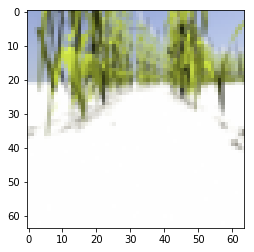

In [5]:
img = utils.load_img('images/1.jpg')
image_array = np.asarray(img)
image_array = helper.crop(image_array, 0.45, 0.1)
image_array = helper.resize(image_array, new_dim=(64, 64))
transformed_image_array = image_array[None, :, :, :]
plt.imshow(image_array)

In [6]:
pred = model.predict(transformed_image_array)
print('Predicted {}'.format(pred))

Predicted [[ 0.01924395]]


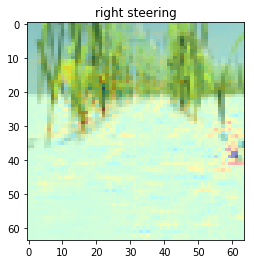

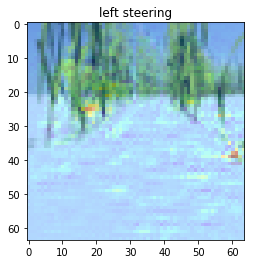

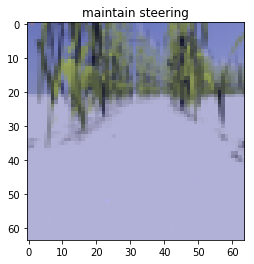

In [7]:
from vis.visualization import visualize_saliency, overlay

titles = ['right steering', 'left steering', 'maintain steering']
modifiers = [None, 'negate', 'small_values']
for i, modifier in enumerate(modifiers):
    heatmap = visualize_saliency(model, layer_idx=-1, filter_indices=0, 
                                 seed_input=transformed_image_array, grad_modifier=modifier)
    plt.figure()
    plt.title(titles[i])
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(image_array, heatmap, alpha=0.7))

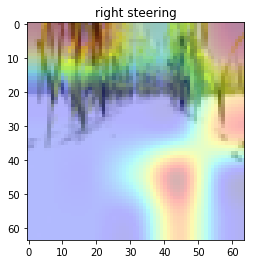

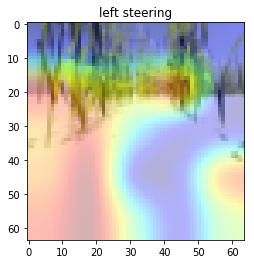

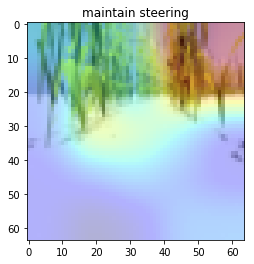

In [8]:
from vis.visualization import visualize_cam

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=transformed_image_array, grad_modifier=modifier)
    plt.figure()
    plt.title(titles[i])
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(image_array, heatmap, alpha=0.7))